In [1]:
# NO CODE

from prob140 import *
from datascience import *
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.style.use('fivethirtyeight')

In [2]:
# NO CODE

p = 1/6
q = 1- p
n = 25
f = 1/3.5
k = np.arange(1, n+1)
probs = (q ** (k-1)) * p
r = probs[0]*f
p0 = q**n +r 
probs[0] = probs[0]*(1-f)
dist = Table().values(np.append(0, k)).probabilities(np.append(p0, probs))

## Markov's Inequality##

To understand the accuracy of estimates, it helps to start by examining
the chance that a random variable is far from its mean.

In this section we will see what we can say about how far a non-negative random variable can be from its mean, using only the mean and not the SD.

### Tail Probabilities ###

Let $X$ be a non-negative random variables. That means all the possible values of $X$ are non-negative. Almost all the random variables you have encountered in this course so far have been non-negative.

Fix $c > 0$ and consider the *right hand tail probability* $P(X \ge c)$. The figure below shows such a probability. You can see from the graph why the term "tail" is used. The red arrow on the horizontal axis is at $E(X)$.

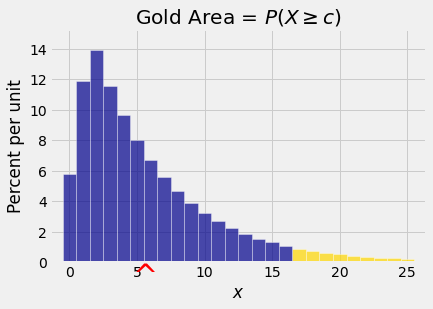

In [3]:
# NO CODE

Plot(dist, show_ev=True, event=np.arange(17, n+1))
plt.xlabel('$x$')
plt.title('Gold Area = $P(X \geq c)$');

How big can the tail probability be? Clearly the answer depends on the shape of the distribution and also on how far $c$ is from the center of the distribution.

The center is measured by $E(X)$, so we will start with the definition of $E(X)$ and see if we can learn anything about the tail probability $P(X \ge c)$.

$$
\begin{align*}
E(X) ~ &= ~ \sum_{\text{all }x} xP(X = x) \\
&= ~ \sum_{\text{all }x < c} xP(X = x) + \sum_{\text{all }x \ge c} xP(X = x) \\
\end{align*}
$$

Both of the sums on the right hand side are non-negative, since all the possible values of $X$ are non-negative. So if we just drop the first sum we get the inequality

$$
E(X) ~ \ge ~ \sum_{\text{all }x \ge c} xP(X = x)
$$

Each $x$ in the sum on the right hand side is at least $c$, so if we replace it by $c$ we have the further inequality

$$
\begin{align*}
E(X) ~ &\ge ~ \sum_{\text{all }x \ge c} cP(X = x) \\
&= ~ c\sum_{\text{all }x \ge c} P(X = x) \\
&= ~ cP(X \ge c)
\end{align*}
$$

### Markov's Bound ###

We have just proved **Markov's Inequality**:

Let $X$ be a non-negative random variable and let $c$ be a positive constant. Then

$$
P(X \ge c) ~ \le ~ \frac{E(X)}{c}
$$

Markov's inequality is a *tail bound*. It gives an upper bound on a tail probability.

Note that the inequality implies that

$$
P(X > c) ~ \le ~ P(X \ge c) ~ \le ~ \frac{E(X)}{c}
$$

Markov's inequality is useful because it makes no assumptions about the shape of the distribution of $X$, other than specifying that the values of $X$ must be non-negative.

Thus for any non-negative random variable $X$, the chance that $X$ is at least 10 times its mean can be bounded by Markov's inequality:

$$
P(X ~ \ge 10E(X)) ~ \le ~ \frac{E(X)}{10E(X)} ~ = ~ \frac{1}{10}
$$

This example points us to an equivalent way of stating Markov's inequality.

Let $X$ be a non-negative random variable and let $k$ be any positive constant (not necessarily an integer). Then

$$
P(X \ge kE(X)) ~ \le ~ \frac{1}{k}
$$

Markov's inequality says that the chance that a non-negative random variable is at least three times its mean can be no more than $1/3$. The chance that the random variable is at least four times its mean can be no more than $1/4$. And so on. A non-negative random variable is not likely to exceed its mean by a big factor.

What does Markov's bound say about the chance that the random variable is at least half its mean?

$$
P(X \ge 0.5E(X)) ~ \le ~ \frac{1}{0.5} ~ = ~ 2
$$

This is correct as a bound, but we already know that a probability can be at most 1. So we don't gain any new information by applying Markov's bound in this case.

We only learn something from Markov's upper bound if we apply it to a tail that starts beyond the expected value.

### Bounds Are Not Approximations ###

It is important to keep in mind that an upper bound is just a ceiling, not an approximation.

For example, if $X$ has the binomial $(100, 0.5)$ distribution then it is non-negative and so Markov's inequality can be applied to see that the tail probability $P(X \ge 4E(X))$ is at most $1/4$. But in fact we know that the chance is 0 because $4E(X) = 4 \times 50 = 200$ but $X$ can't be more than 100.

So, while it's true that $P(X \ge 200) \le 1/4$, the exact value of the chance is 0 and the bound is neither close nor helpful.

In general, if you know the distribution of $X$ then you might be able to considerably better by using the distribution than Markov's bound.